In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#show all columns and rows
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
from datetime import datetime, timedelta

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import requests
import json
#from pandas.io.json import json_normalize

In [5]:
import joblib

In [6]:
key = #get your own from https://darksky.net/dev

# model import

In [8]:
# Niepodległości
model_xgb = joblib.load("model/nie/model_xgb.pkl")
model_lgb = joblib.load("model/nie/model_lgb.pkl")

In [31]:
# Wokalna
model_xgb = joblib.load("model/wok/model_xgb.pkl")
model_lgb = joblib.load("model/wok/model_lgb.pkl")

# data for forcast and chart

### recent data for PM2.5

In [9]:
# Niepodległości
gios_now = json.loads(requests.get('http://api.gios.gov.pl/pjp-api/rest/data/getData/3585').text)

In [32]:
# Wokalna
gios_now = json.loads(requests.get('http://api.gios.gov.pl/pjp-api/rest/data/getData/3731').text)

In [33]:
gios_now = pd.DataFrame(gios_now['values']) 
gios_now['value'] = gios_now['value'].interpolate(limit_direction='both')
gios_now['date'] = gios_now['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
gios_now.head()

,date,value
0,2020-02-18 16:00:00,5.70
1,2020-02-18 15:00:00,5.70
2,2020-02-18 14:00:00,5.42
3,2020-02-18 13:00:00,5.83
4,2020-02-18 12:00:00,6.06


In [34]:
#date to start a chart
times = int(datetime.timestamp(min(gios_now['date'])))
times

1581811200

### data from darksky

In [12]:
dark_hour = []

In [13]:
for i in range(5):
    darksky = json.loads(requests.get('https://api.darksky.net/forecast/{}/52.2193,21.0047,{}'.format(key, times)).text)
    dark_hour.extend(darksky['hourly']['data'])
    times += 24*60*60

In [14]:
table_hour = pd.DataFrame(dark_hour) 
table_hour.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,24.72,0.26,29.45,0.86,clear-night,335.4,0.0,0.0,NaN,1024.0,Clear,33.32,1581807600,0,10.0,180,28.32,11.36
1,25.86,0.21,29.05,0.82,clear-night,329.1,0.0,0.0,NaN,1023.7,Clear,34.06,1581811200,0,10.0,183,28.83,10.87
2,26.57,0.22,30.22,0.85,clear-night,327.3,0.0,0.0,NaN,1023.2,Clear,34.39,1581814800,0,10.0,182,29.50,10.23
3,26.76,0.27,29.93,0.82,clear-night,326.5,0.0,0.0,NaN,1022.5,Clear,34.80,1581818400,0,10.0,187,30.92,10.94
4,27.52,0.35,30.25,0.81,partly-cloudy-night,326.1,0.0,0.0,NaN,1021.9,Partly Cloudy,35.66,1581822000,0,10.0,191,32.17,11.67


In [15]:
table_hour['date'] = table_hour['time'].apply(lambda x: datetime.fromtimestamp(x))
table_hour['year'] = table_hour['date'].apply(lambda x: x.year)
table_hour['month'] = table_hour['date'].apply(lambda x: x.month)
table_hour['day'] = table_hour['date'].apply(lambda x: x.day)
table_hour['hour'] = table_hour['date'].apply(lambda x: x.hour)
table_hour['day_of_week'] = table_hour['date'].apply(lambda x: x.isocalendar()[2])
table_hour['no_of_week'] = table_hour['date'].apply(lambda x: x.isocalendar()[1])

In [19]:
table_hour.columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'ozone', 'precipIntensity', 'precipProbability', 'precipType',
       'pressure', 'summary', 'temperature', 'time', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'windSpeed', 'date', 'year', 'month', 'day',
       'hour', 'day_of_week', 'no_of_week'],
      dtype='object')

In [16]:
table_hour.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,date,year,month,day,hour,day_of_week,no_of_week
0,24.72,0.26,29.45,0.86,clear-night,335.4,0.0,0.0,NaN,1024.0,Clear,33.32,1581807600,0,10.0,180,28.32,11.36,2020-02-16 00:00:00,2020,2,16,0,7,7
1,25.86,0.21,29.05,0.82,clear-night,329.1,0.0,0.0,NaN,1023.7,Clear,34.06,1581811200,0,10.0,183,28.83,10.87,2020-02-16 01:00:00,2020,2,16,1,7,7
2,26.57,0.22,30.22,0.85,clear-night,327.3,0.0,0.0,NaN,1023.2,Clear,34.39,1581814800,0,10.0,182,29.50,10.23,2020-02-16 02:00:00,2020,2,16,2,7,7
3,26.76,0.27,29.93,0.82,clear-night,326.5,0.0,0.0,NaN,1022.5,Clear,34.80,1581818400,0,10.0,187,30.92,10.94,2020-02-16 03:00:00,2020,2,16,3,7,7
4,27.52,0.35,30.25,0.81,partly-cloudy-night,326.1,0.0,0.0,NaN,1021.9,Partly Cloudy,35.66,1581822000,0,10.0,191,32.17,11.67,2020-02-16 04:00:00,2020,2,16,4,7,7


### handling missing data

In [17]:
# interpolate

cols=[ 'apparentTemperature', 'cloudCover', 'dewPoint',
       'humidity',  'precipType', 'pressure', 'temperature',
       'time', 'uvIndex', 'visibility', 'windBearing',
       'windSpeed']

for col in cols:
    table_hour[col] = table_hour[col].interpolate(limit_direction='both')

In [20]:
# fill with 0

#cols=['precipAccumulation','precipIntensity','precipProbability']
cols=['precipIntensity','precipProbability']

for col in cols:
    table_hour[col] = table_hour[col].fillna(0)

In [21]:
table_hour['precipAccumulation'] = 0

In [22]:
# value from another column

table_hour['windGust'] = table_hour['windGust'].fillna(table_hour['windSpeed'])

In [23]:
# information about winter break

table_hour['winter_break'] = 0 
mask = (table_hour['date'] >='2020-02-10') & (table_hour['date'] <='2020-02-23')
table_hour['winter_break'][mask] = 1

### prediction

In [24]:
feats = ['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 
         'precipAccumulation', 'precipIntensity', 'precipProbability',
         'pressure', 'temperature',  'uvIndex',
         'visibility', 'windBearing', 'windGust', 'windSpeed',
         'year', 'month', 'day',  'hour', 'day_of_week', 'no_of_week', 'winter_break']

In [35]:
prediction_xgb = np.exp(model_xgb.predict(table_hour[feats].values))
prediction_xgb

array([31.13206  , 33.641113 , 36.010483 , 32.249466 , 32.759193 ,
       28.409437 , 29.076576 , 27.13678  , 20.851145 , 19.777935 ,
       15.945517 , 14.104611 , 15.547837 , 15.247274 , 10.602524 ,
       10.60921  , 16.379402 , 13.739322 , 13.533032 ,  8.79352  ,
       10.777832 , 15.9877405, 15.997395 , 12.221739 ,  9.485379 ,
        9.605323 ,  8.592051 ,  8.626222 ,  8.7553   , 10.969765 ,
       12.355738 , 12.962488 , 13.595263 ,  8.969702 ,  8.294629 ,
        7.8436503,  8.522854 ,  8.459835 , 10.361788 ,  9.855624 ,
       10.292941 , 14.46251  , 14.253714 , 15.201916 , 17.877586 ,
       19.063183 , 15.540255 , 16.667982 , 23.158556 , 23.967075 ,
       19.480886 , 21.021973 , 21.76303  , 19.904062 , 20.648634 ,
       15.80823  , 12.252504 , 11.474005 , 11.388237 , 12.256849 ,
       10.904394 , 10.939632 , 10.074177 ,  9.71076  ,  8.871854 ,
       11.165327 , 14.422475 , 13.130554 ,  9.819793 , 15.69329  ,
       15.397608 , 16.173595 , 16.706821 , 20.571169 , 17.8998

In [36]:
prediction_lgb = np.exp(model_lgb.predict(table_hour[feats].values))
prediction_lgb

array([28.04778755, 30.85431563, 31.23299387, 29.14987389, 24.8460213 ,
       24.32607143, 22.036256  , 21.30217327, 17.28256161, 19.22178352,
       18.05723331, 17.73071231, 15.68876685, 15.16551876, 15.92578651,
       14.88360816, 15.18996248, 13.50228082, 13.12984015, 11.88141602,
       13.83027983, 13.46267258, 13.70135071, 12.84687973, 11.31751254,
       10.39690383,  9.68795929,  9.49442798,  9.75926006, 10.39520967,
       10.81103472, 14.73277786, 14.73277786, 15.06186031, 14.42083515,
       13.41527109, 12.59535491, 12.62743404, 15.28785835, 16.05357711,
       17.83504475, 19.07106728, 17.8108921 , 19.03428698, 22.49387877,
       21.05347327, 24.41334272, 27.01931858, 17.55822815, 19.88615141,
       20.50795596, 19.42428571, 18.01053917, 17.68843476, 18.1815016 ,
       15.16948198, 12.96777735, 11.16073487,  9.71771727,  9.18630136,
        9.81777293,  9.81777293,  9.35441026,  9.36565795,  8.91534518,
       10.7757629 , 11.18292579, 12.11639042, 10.98143131, 16.14

In [37]:
table_hour['pred_xgb'] = prediction_xgb
table_hour['pred_lgb'] = prediction_lgb
table_hour.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,date,year,month,day,hour,day_of_week,no_of_week,precipAccumulation,winter_break,pred_xgb,pred_lgb
0,24.72,0.26,29.45,0.86,clear-night,335.4,0.0,0.0,NaN,1024.0,Clear,33.32,1581807600,0,10.0,180,28.32,11.36,2020-02-16 00:00:00,2020,2,16,0,7,7,0,1,31.132059,28.047788
1,25.86,0.21,29.05,0.82,clear-night,329.1,0.0,0.0,NaN,1023.7,Clear,34.06,1581811200,0,10.0,183,28.83,10.87,2020-02-16 01:00:00,2020,2,16,1,7,7,0,1,33.641113,30.854316
2,26.57,0.22,30.22,0.85,clear-night,327.3,0.0,0.0,NaN,1023.2,Clear,34.39,1581814800,0,10.0,182,29.50,10.23,2020-02-16 02:00:00,2020,2,16,2,7,7,0,1,36.010483,31.232994
3,26.76,0.27,29.93,0.82,clear-night,326.5,0.0,0.0,NaN,1022.5,Clear,34.80,1581818400,0,10.0,187,30.92,10.94,2020-02-16 03:00:00,2020,2,16,3,7,7,0,1,32.249466,29.149874
4,27.52,0.35,30.25,0.81,partly-cloudy-night,326.1,0.0,0.0,NaN,1021.9,Partly Cloudy,35.66,1581822000,0,10.0,191,32.17,11.67,2020-02-16 04:00:00,2020,2,16,4,7,7,0,1,32.759193,24.846021


In [38]:
chart_data = table_hour[['date','pred_xgb','pred_lgb']]

# chart

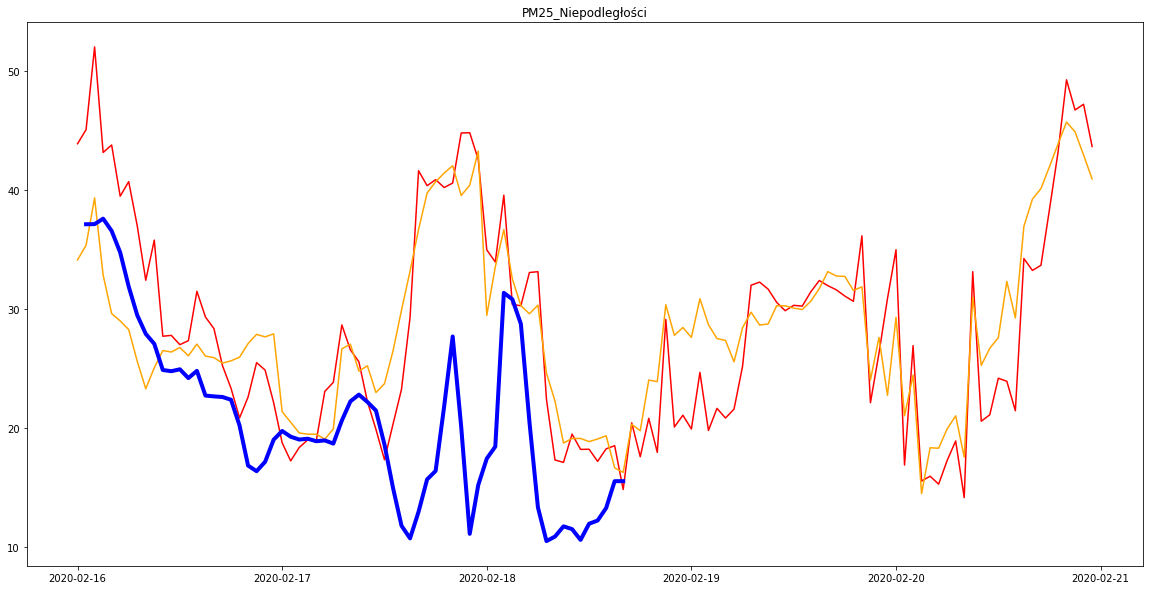

In [29]:
plt.figure(figsize=(20,10))
plt.plot(chart_data['date'], chart_data['pred_xgb'], color='red') #forcast
plt.plot(chart_data['date'], chart_data['pred_lgb'], color='orange') #forcast
plt.plot(gios_now['date'], gios_now['value'], color='blue', linewidth = 4) #actual

plt.title('PM25_Niepodległości')
plt.show()

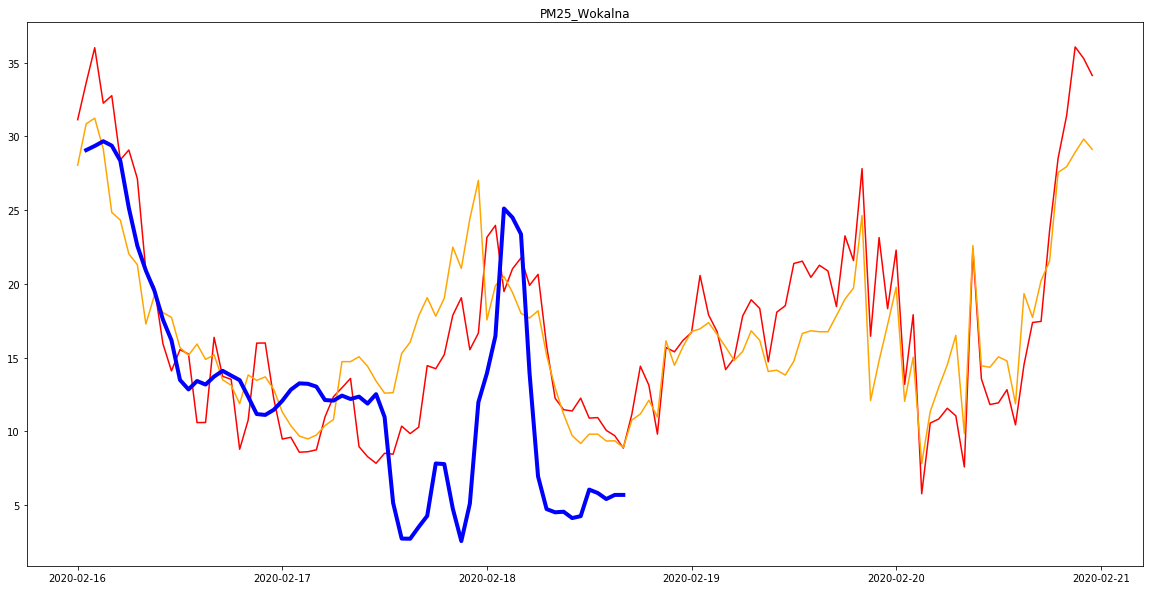

In [39]:
plt.figure(figsize=(20,10))
plt.plot(chart_data['date'], chart_data['pred_xgb'], color='red') #forcast
plt.plot(chart_data['date'], chart_data['pred_lgb'], color='orange') #forcast
plt.plot(gios_now['date'], gios_now['value'], color='blue', linewidth = 4) #actual

plt.title('PM25_Wokalna')
plt.show()